#Lab.4: Part of Speech

**Authors:**

* Ramón Mateo Navarro
* Benet Manzanares Salor



##Installation ans imports

In [1]:
!pip install python-crfsuite
import os
import nltk
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import time

nltk.download('averaged_perceptron_tagger')
nltk.download('treebank')

     |████████████████████████████████| 743 kB 28.2 MB/s 
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package treebank to /root/nltk_data...
[nltk_data]   Unzipping corpora/treebank.zip.


True

## Data

In [2]:
data = nltk.corpus.treebank.tagged_sents()
test_data = data[3001:]
train_data_sizes = [500, 1000, 1500, 2000, 2500, 3000]

train_data_splits = []
for size in train_data_sizes:
  train_data_splits.append(data[:size])

## Models

In [22]:
models_dict = {"HMM": nltk.tag.hmm.HiddenMarkovModelTrainer(),
               "TnT": nltk.tag.tnt.TnT(),
               "perceptron": nltk.tag.perceptron.PerceptronTagger(load=False),
               "CRF": nltk.tag.CRFTagger()}

## Training and evaluation

In [23]:
def train_and_evaluate(model, train_data, test_data, model_name):
  if model_name == "HMM":
    model = model.train_supervised(train_data)
  elif model_name == "CRF":
    model.train(train_data, 'crf_tagger_model')
  else:
    model.train(train_data)
  accuracy = model.evaluate(test_data)
  del model
  return accuracy

In [25]:
models_accuracies_dict = {}
models_times_dict = {}

with tqdm(range(len(models_dict) * len(train_data_splits))) as pbar:
  for name, model in models_dict.items():
    for train_data in train_data_splits:
      pbar.set_description(f"Model [{name}] with train split of size [{len(train_data)}]")
      start_time = time.time()
      accuracy = train_and_evaluate(model, train_data, test_data, name)
      elapsed_time = time.time() - start_time    
      # Append accuracy
      accuracies_list = models_accuracies_dict.get(name, [])
      accuracies_list.append(accuracy)
      models_accuracies_dict[name] = accuracies_list
      # Append time
      times_list = models_times_dict.get(name, [])
      times_list.append(elapsed_time)
      models_times_dict[name] = times_list
      # Update progress bar
      pbar.update()

  0%|          | 0/24 [00:00<?, ?it/s]

## [Model / Data size / Accuracy] figure

Accuracies:
{'HMM': [0.17281016377857483, 0.2206905492416058, 0.26161358627544185, 0.3043947971133486, 0.3352059115854976, 0.36856661337020874], 'TnT': [0.747461216023508, 0.7958601616179076, 0.8273626895985481, 0.8479754548204486, 0.8617172983017156, 0.8747677282744911], 'perceptron': [0.9128818979300808, 0.9313339959379456, 0.9415755585324749, 0.9470636532561255, 0.9511689209627933, 0.9543667084395662], 'CRF': [0.909684110453308, 0.9250680610172421, 0.9331489563977357, 0.939285251285597, 0.9431312389265806, 0.947582213387494]}
Elapsed times:
{'HMM': [8.058260679244995, 8.283672094345093, 8.928446054458618, 9.700197696685791, 9.866772651672363, 10.22328233718872], 'TnT': [16.065272331237793, 41.311729192733765, 68.16125202178955, 85.97892808914185, 92.06563472747803, 96.2613275051117], 'perceptron': [5.06838059425354, 8.63008999824524, 12.255571603775024, 16.216739892959595, 19.790955305099487, 23.18325710296631], 'CRF': [5.477788209915161, 13.033117055892944, 21.344390392303467, 35.4

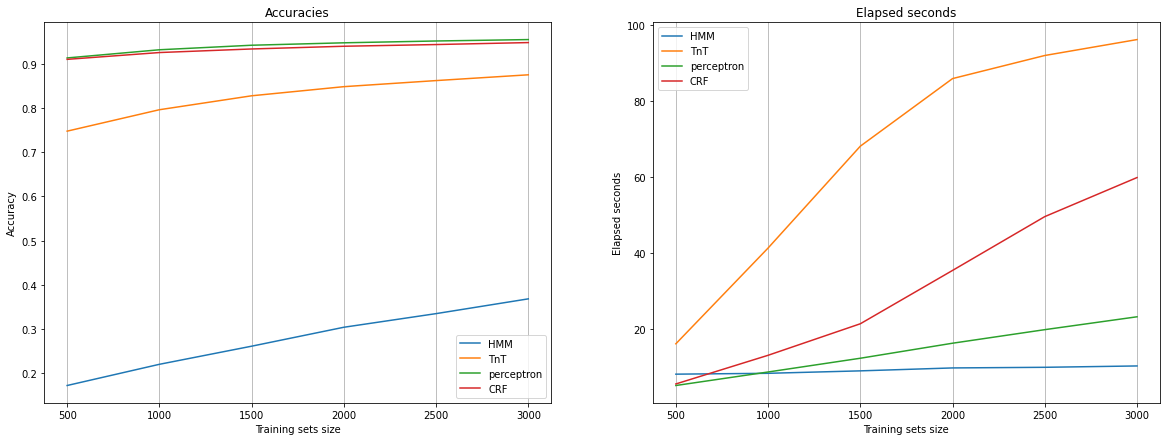

In [28]:
fig, axes = plt.subplots(1, 2, figsize=(20,7))

for accuracies_list, times_list in zip(models_accuracies_dict.values(), models_times_dict.values()):
  axes[0].plot(train_data_sizes, accuracies_list)
  axes[1].plot(train_data_sizes, times_list)

axes[0].set_title('Accuracies')
axes[0].set_xlabel('Training sets size')
axes[0].set_ylabel('Accuracy')
axes[0].legend(list(models_accuracies_dict.keys()))
axes[0].grid(b=True, axis="x")
axes[1].set_title('Elapsed seconds')
axes[1].set_xlabel('Training sets size')
axes[1].set_ylabel('Elapsed seconds')
axes[1].grid(b=True, axis="x")
axes[1].legend(list(models_times_dict.keys()))

fig.show()

print(f"Accuracies:\n{models_accuracies_dict}\nElapsed times:\n{models_times_dict}")

## Conclusions
Observing both graphs we can conclude that the better and most accurate models are CRF(94,76%) and Perceptron (95,44%). Following we have TnT with a maximum accuracy of 87,48% and the highest training time (up to 100 seconds, but with logaritmic trendline). Finally we find HMM, with the lowest accuracy (36,86% when it is trained on the largest dataset) and the minimum training time (no more than 11 seconds, almost linear in relation to the training set size).

At this point, the comparision is between Perceptron and CRF. As the accuracy difference is minimal, our analysis is focused on the training time divergence for each training dataset. On this terms, the Perceptron model provides the better results; since it is able to be trained in less time and obtain the better accuracy independently of the dataset. For example, on the largest dataset, it is trained in less than 25 seconds versus the 60 seconds required for CRF. Consequently, with the better accuracy and training time, Perceptron is the better Part-Of-Speech tagging model.

Additionaly, we note that both Perceptron and CRF obtain a superior accuracy even with the smallest dataset (500 samples) which is not very different from the maximum. Therefore, if training time is critical, using the Perceptron model with a reduced training dataset is recommended. Nevertheless, as PoS models are trained once and used millions, and the training times are not huge, it is recommended to train with the largest training set.